In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import numpy as np

# Configurar matplotlib para Jupyter
%matplotlib inline

# Registrar conversores para matplotlib
register_matplotlib_converters()

# Configurações de estilo
plt.style.use('default')
sns.set_palette("husl")

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
# Importar dados (certificar de fazer parse das datas e definir coluna date como índice)
try:
    df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
    print("Dados carregados com sucesso!")
    print(f"Shape original: {df.shape}")
    print(f"Período: {df.index.min()} até {df.index.max()}")
except FileNotFoundError:
    print("Arquivo 'fcc-forum-pageviews.csv' não encontrado!")
    print("Certifique-se de que o arquivo está no diretório correto")
    # Criar dados de exemplo para demonstração
    dates = pd.date_range('2016-05-09', '2019-12-03', freq='D')
    values = np.random.randint(10000, 200000, len(dates))
    df = pd.DataFrame({'value': values}, index=dates)
    df.index.name = 'date'
    print("Usando dados de exemplo para demonstração")

# Visualizar primeiras linhas
print("\nPrimeiras 5 linhas:")
print(df.head())

Dados carregados com sucesso!
Shape original: (1304, 1)
Período: 2016-05-09 00:00:00 até 2019-12-03 00:00:00

Primeiras 5 linhas:
            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933


In [3]:
# Estatísticas básicas antes da limpeza
print("Estatísticas ANTES da limpeza:")
print(df['value'].describe())

Estatísticas ANTES da limpeza:
count    1.304000e+03
mean     6.722068e+04
std      5.933964e+04
min      1.201000e+03
25%      3.575775e+04
50%      5.719750e+04
75%      8.388300e+04
max      1.173655e+06
Name: value, dtype: float64


In [4]:
# Limpeza dos dados
# Filtrar dias onde as visualizações estavam nos 2.5% superiores e 2.5% inferiores
quantile_025 = df['value'].quantile(0.025)
quantile_975 = df['value'].quantile(0.975)

print(f"Percentil 2.5%: {quantile_025:,.0f}")
print(f"Percentil 97.5%: {quantile_975:,.0f}")

# Aplicar filtro
df_original = df.copy()
df = df[(df['value'] >= quantile_025) & (df['value'] <= quantile_975)]

print(f"\nRegistros removidos: {len(df_original) - len(df)}")
print(f"Registros restantes: {len(df)}")
print(f"Shape após limpeza: {df.shape}")

Percentil 2.5%: 17,876
Percentil 97.5%: 177,613

Registros removidos: 66
Registros restantes: 1238
Shape após limpeza: (1238, 1)


In [5]:
# Estatísticas após limpeza
print("Estatísticas APÓS a limpeza:")
print(df['value'].describe())


Estatísticas APÓS a limpeza:
count      1238.000000
mean      63060.147819
std       31674.626598
min       18060.000000
25%       37244.250000
50%       57197.500000
75%       81646.500000
max      177588.000000
Name: value, dtype: float64


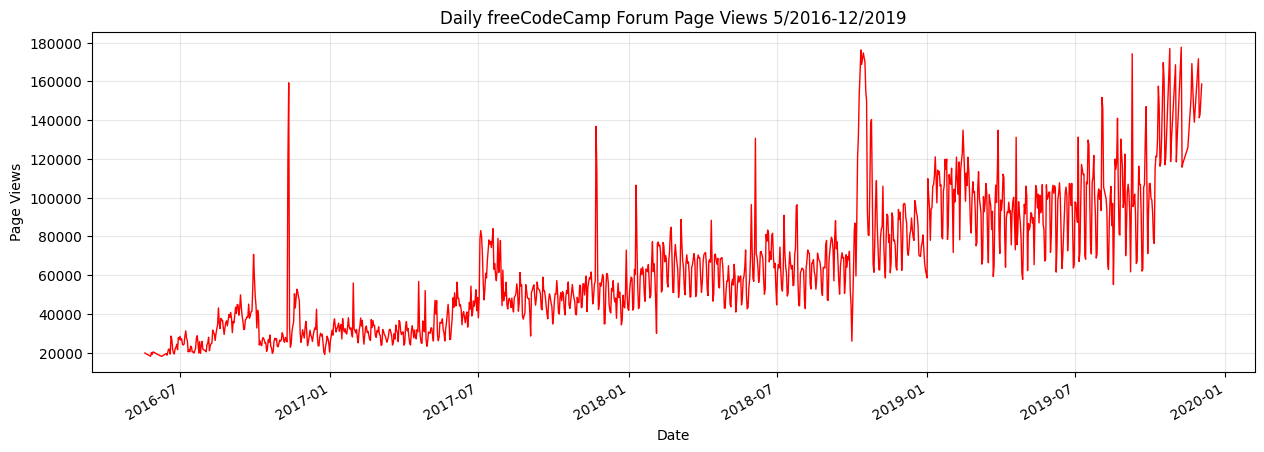

Line plot criado com sucesso!
Imagem salva como 'line_plot.png'


In [6]:
def draw_line_plot():
    """
    Desenha um gráfico de linha mostrando as visualizações diárias ao longo do tempo
    """
    # Criar figura e eixos
    fig, ax = plt.subplots(figsize=(15, 5))
    
    # Plotar o gráfico de linha
    ax.plot(df.index, df['value'], color='red', linewidth=1)
    
    # Configurar título e labels
    ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    ax.set_xlabel('Date')
    ax.set_ylabel('Page Views')
    
    # Formatar o plot
    fig.autofmt_xdate()  # Formatar datas no eixo x
    
    # Adicionar grid para melhor visualização
    ax.grid(True, alpha=0.3)
    
    # Salvar imagem
    fig.savefig('line_plot.png', dpi=300, bbox_inches='tight')
    
    return fig

# Executar função
line_fig = draw_line_plot()
plt.show()

print("Line plot criado com sucesso!")
print("Imagem salva como 'line_plot.png'")

Estrutura dos dados para bar plot:
Shape: (4, 12)
Anos: [2016, 2017, 2018, 2019]
Meses disponíveis: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]


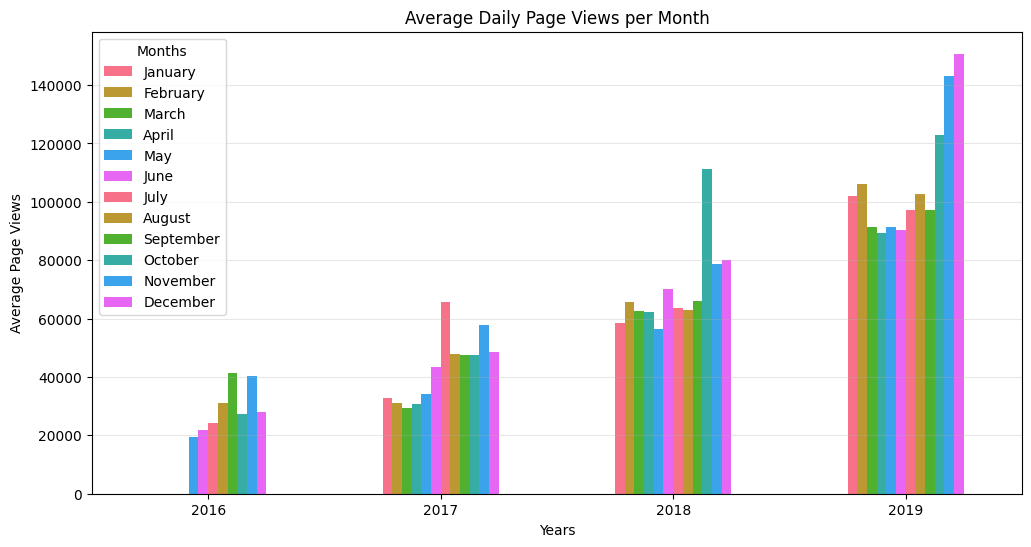

Bar plot criado com sucesso!
Imagem salva como 'bar_plot.png'


In [7]:
def draw_bar_plot():
    """
    Desenha um gráfico de barras mostrando a média de visualizações por mês, agrupadas por ano
    """
    # Copiar e modificar dados para gráfico de barras mensal
    df_bar = df.copy()
    df_bar['year'] = df_bar.index.year
    df_bar['month'] = df_bar.index.month
    
    # Agrupar por ano e mês, depois calcular média
    df_bar = df_bar.groupby(['year', 'month'])['value'].mean()
    df_bar = df_bar.unstack()
    
    print("Estrutura dos dados para bar plot:")
    print(f"Shape: {df_bar.shape}")
    print(f"Anos: {df_bar.index.tolist()}")
    print(f"Meses disponíveis: {[col for col in df_bar.columns if not pd.isna(col)]}")
    
    # Desenhar gráfico de barras
    fig = df_bar.plot(kind='bar', figsize=(12, 6), legend=True).figure
    
    # Configurar labels e título
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.title('Average Daily Page Views per Month')
    
    # Configurar legenda
    month_names = ['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December']
    plt.legend(labels=month_names, title='Months')
    
    # Rotacionar labels do eixo x
    plt.xticks(rotation=0)
    
    # Adicionar grid
    plt.grid(True, alpha=0.3, axis='y')
    
    # Salvar imagem
    fig.savefig('bar_plot.png', dpi=300, bbox_inches='tight')
    
    return fig

# Executar função
bar_fig = draw_bar_plot()
plt.show()

print("Bar plot criado com sucesso!")
print("Imagem salva como 'bar_plot.png'")

Dados preparados para box plots:
Anos únicos: [np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019)]
Meses únicos: ['May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec' 'Jan' 'Feb' 'Mar' 'Apr']


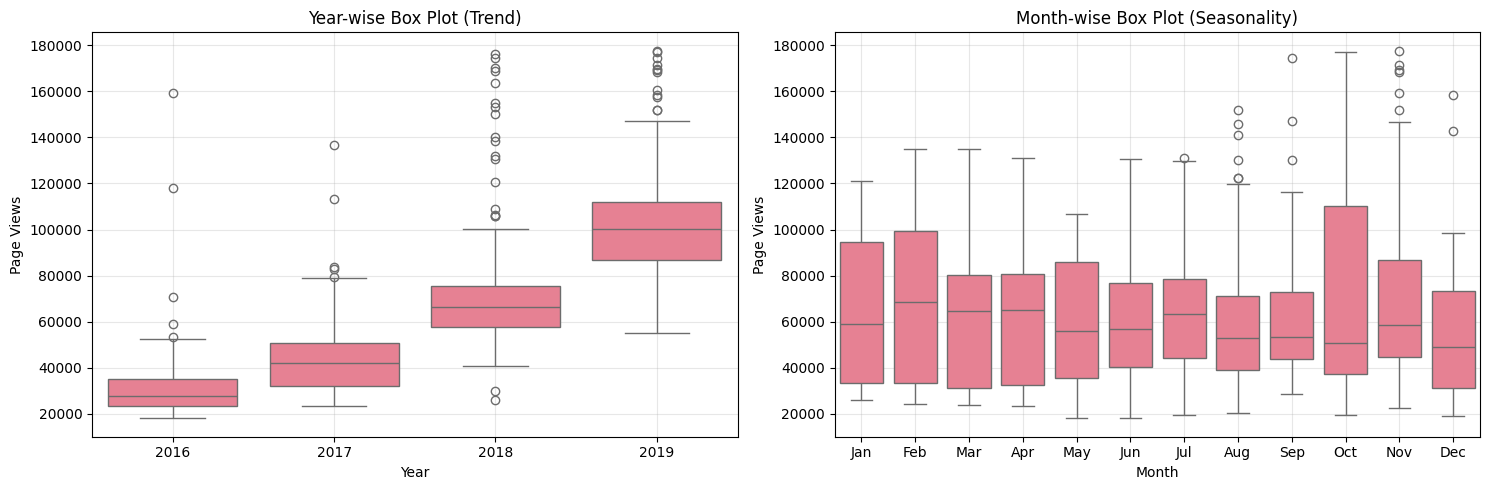

Box plots criados com sucesso!
Imagem salva como 'box_plot.png'


In [8]:
def draw_box_plot():
    """
    Desenha box plots para mostrar tendência (por ano) e sazonalidade (por mês)
    """
    # Preparar dados para box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = [d.year for d in df_box.date]
    df_box['month'] = [d.strftime('%b') for d in df_box.date]
    
    print("Dados preparados para box plots:")
    print(f"Anos únicos: {sorted(df_box['year'].unique())}")
    print(f"Meses únicos: {df_box['month'].unique()}")
    
    # Desenhar box plots (usando Seaborn)
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Box Plot por Ano (Tendência)
    sns.boxplot(x='year', y='value', data=df_box, ax=ax1)
    ax1.set_title('Year-wise Box Plot (Trend)')
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Page Views')
    ax1.grid(True, alpha=0.3)
    
    # Box Plot por Mês (Sazonalidade)
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    sns.boxplot(x='month', y='value', data=df_box, order=month_order, ax=ax2)
    ax2.set_title('Month-wise Box Plot (Seasonality)')
    ax2.set_xlabel('Month')
    ax2.set_ylabel('Page Views')
    ax2.grid(True, alpha=0.3)
    
    # Ajustar layout
    plt.tight_layout()
    
    # Salvar imagem
    fig.savefig('box_plot.png', dpi=300, bbox_inches='tight')
    
    return fig

# Executar função
box_fig = draw_box_plot()
plt.show()

print("Box plots criados com sucesso!")
print("Imagem salva como 'box_plot.png'")


In [9]:
print("=" * 60)
print("RESUMO FINAL DA ANÁLISE")
print("=" * 60)

print(f"Período analisado: {df.index.min().strftime('%Y-%m-%d')} até {df.index.max().strftime('%Y-%m-%d')}")
print(f"Total de dias analisados: {len(df)}")
print(f"Média diária de visualizações: {df['value'].mean():,.0f}")
print(f"Mediana de visualizações: {df['value'].median():,.0f}")
print(f"Máximo de visualizações: {df['value'].max():,.0f}")
print(f"Mínimo de visualizações: {df['value'].min():,.0f}")

RESUMO FINAL DA ANÁLISE
Período analisado: 2016-05-19 até 2019-12-03
Total de dias analisados: 1238
Média diária de visualizações: 63,060
Mediana de visualizações: 57,198
Máximo de visualizações: 177,588
Mínimo de visualizações: 18,060


In [10]:
# Encontrar os dias com mais e menos visualizações
max_day = df['value'].idxmax()
min_day = df['value'].idxmin()

print(f"Dia com mais visualizações: {max_day.strftime('%Y-%m-%d')} ({df.loc[max_day, 'value']:,.0f} views)")
print(f"Dia com menos visualizações: {min_day.strftime('%Y-%m-%d')} ({df.loc[min_day, 'value']:,.0f} views)")

Dia com mais visualizações: 2019-11-08 (177,588 views)
Dia com menos visualizações: 2016-05-26 (18,060 views)


In [11]:
# Análise por ano
yearly_stats = df.groupby(df.index.year)['value'].agg(['mean', 'std', 'count'])
print("Estatísticas por Ano:")
print(yearly_stats.round(0))

Estatísticas por Ano:
          mean      std  count
date                          
2016   30831.0  13974.0    205
2017   43113.0  13988.0    365
2018   69569.0  21150.0    362
2019  100744.0  22937.0    306


In [12]:
# Análise por mês
monthly_stats = df.groupby(df.index.month)['value'].mean().round(0)
monthly_names = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 
                 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
print("Média por Mês:")
for month, avg in monthly_stats.items():
    print(f"{monthly_names[month-1]}: {avg:,.0f} visualizações")

print("\n" + "=" * 60)
print("ANÁLISE CONCLUÍDA - Todos os gráficos foram salvos!")
print("Arquivos gerados: line_plot.png, bar_plot.png, box_plot.png")
print("=" * 60)

Média por Mês:
Jan: 64,474 visualizações
Fev: 67,587 visualizações
Mar: 61,092 visualizações
Abr: 60,866 visualizações
Mai: 58,641 visualizações
Jun: 59,427 visualizações
Jul: 63,363 visualizações
Ago: 60,395 visualizações
Set: 63,016 visualizações
Out: 72,680 visualizações
Nov: 70,284 visualizações
Dez: 54,177 visualizações

ANÁLISE CONCLUÍDA - Todos os gráficos foram salvos!
Arquivos gerados: line_plot.png, bar_plot.png, box_plot.png
